# Chapter 2. 逆向思维--从递推到递归

## 概要
### 2.1 递归：计算思维的核心
### 2.2 遍历：递归思想的典型应用
### 2.3 堆栈和队列：遍历的数据结构
### 2.4 嵌套：自然语言的结构特征

In [19]:
!pip install RISE # for ppt
!pip install graphviz  
from graphviz import Digraph 

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


![t](./assets/img/chapter2_mind.png)

## 2.0 渐进符号

* 紧确界 $\Theta$

$\Theta(n^2)$
* 上界 $O$

$O(n^2)$  

$O(nlg^n)$
* 非紧上界 $o$
* 下界 $\Omega$

$\Omega(n)$
* 非紧下界 $omega$

## 2.0 渐进符号

* 紧确界 $\Theta$

$\Theta(g(n))=\{f(n): 存在正常数c_1，c_2 和 n_0， 使对所有的 n >= n_0, 有 0 <= c_1g(n) <= f(n) <= c_2g(n)\}$

* 上界 $O$

$O(g(n))=\{f(n): 存在正常数c 和 n_0， 使对所有的 n >= n_0, 有 0 <= f(n) <= cg(n)\}$

* 非紧上界 $o$

$o(g(n))=\{f(n): 存在正常数c 和 n_0， 使对所有的 n >= n_0, 有 0 <= f(n) < cg(n)\}$

* 下界 $\Omega$

$\Omega(g(n))=\{f(n): 存在正常数c， 使对所有的 n >= n_0, 有 0 <= c(n) <= f(n) \}$

* 非紧下界 $omega$

$\Omega(g(n))=\{f(n): 存在正常数c， 使对所有的 n >= n_0, 有 0 <= c(n) < f(n) \}$



## 2.0 渐进符号

<img style="float: center;" src="./assets/img/func_trend.png" width=800 height=600 align="center">


## 2.1 递归：计算思维的核心
|属性 | 递推(Iterative) | 递归(Recursive) |
|--- | --- | --- |
|特点 | 从小到大，从易到难，由局部到整体 | 从大到小，从难到易，由整体到局部 |
|优点 | 直观，易理解| 1. 只要解决当前一步的问题，就能解决全部的问题 |
|优点 | | 2. 解题过程可复制 |
|条件 | | 1. 每一个问题的形式相同 |
|条件 | | 2. 确定好结束条件 |
|例子 | 2! -> 5! -> 100! | 100! = 100 * 99! |



### 抢20问题
你和一位对手来做一个游戏。

你们其中的一个人先从1和2中挑一个数字，另一个则在对方的基础上选择加1或者加2。

然后又轮到先前的人，你或者他可以再次选择加1或者加2。

之后双方交替的选择加1或者加2，谁正好加到20，谁就赢了。

你用什么策略来保证一定赢？


递归：要抢到20，只要保证能抢到17

17

递归：要抢到17，只要保证能抢到14

17
14


递归：最终推出，只要能抢到2就能保证抢到20

17
14
11
8
5
2

### 上台阶问题
按照`抢20问题`的方法，从1开始（以1为七点）加到20，每次可以增加1或者2，有多少种不同的增加方法？比如<br>
1、4、7、10、12、15、18、20是一种,<br>
1、2、5、8、11、14、17、20又是一种。<br>
我们想知道这样不同的过程由多少种。

先看答案

$F(n)=\frac{(\frac{(1+\sqrt5)}{2})^n-(\frac{(1-\sqrt5)}{2})^n}{\sqrt5}$

如果使用归纳法，很难推到出此公式，但是使用递归方法就很容易

**递归方法**

$F(20) = F(19) + F(18)$<br>
$F(19) = F(18) + F(17)$<br>
$F(18) = F(17) + F(16)$<br>
...<br>
...<br>
$F(1) = 1$<br>
$F(0) = 1$

**斐波那契数列！**

In [1]:
import math

def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

def num_of_ways_to_n(n):
    return math.floor(((((1 + math.sqrt(5))/2)**n) - (((1 - math.sqrt(5))/2)**n))/math.sqrt(5))

print('fib(20):{}'.format(fib(20)))
print('num_of_ways_to_n(n):{}'.format(num_of_ways_to_n(20)))

fib(20):6765
num_of_ways_to_n(n):6765


### 汉诺塔

汉诺塔（港台：河内塔）（Tower of Hanoi）是根据一个传说形成的数学问题：

有三根杆子A，B，C。A杆上有 64 个 (N>1) 穿孔圆盘，盘的尺寸由下到上依次变小。要求按下列规则将所有圆盘移至 C 杆：

每次只能移动一个圆盘；
大盘不能叠在小盘上面。
提示：可将圆盘临时置于 B 杆，也可将从 A 杆移出的圆盘重新移回 A 杆，但都必须遵循上述两条规则。

问：如何移？最少要移动多少次？
![](./assets/img/tower_of_hanoi.jpg)

### 汉诺塔递归解法调用示意图
<img style="float: right;" src="./assets/img/hanoi_recursion.jpg" width=900 height=600 align="center">

### 汉诺塔递归解法调用示意图
<img style="float: right;" src="./assets/img/hanoi_recursion.jpg" width=900 height=600  align="center">


移动次数：$S(64) = 2S(63) + 1 = 2^{64} - 1$

In [35]:
def hanoi(n, src, dest, temp, counter, is_print=False):
    if n == 1:
        if is_print:
            print(src, '-->', temp)
        counter = counter + 1
        return counter
    else:
        counter = hanoi(n - 1, src, temp, dest, counter, is_print)
        counter = hanoi(1    , src, dest, temp, counter, is_print)
        counter = hanoi(n - 1, temp, dest, src, counter, is_print)
        
    return counter


In [36]:
counter  = 0
N = 3

counter = hanoi(N, 'A', 'T', 'B', counter, is_print=True)
print('Total moving {} steps for hanoi tower of {} disks.'.format(counter, N))

A --> B
A --> T
T --> A
A --> B
B --> T
B --> A
A --> B
Total moving 7 steps for hanoi tower of 3 disks.


In [17]:
counter  = 0
N = 6

counter = hanoi(N, 'A', 'T', 'B', counter)
print('Total moving {} steps for hanoi tower of {} disks.'.format(counter, N))

Total moving 63 steps for hanoi tower of 6 disks.


### 八皇后问题
这个问题是19实际的一位国际象棋手Max Bethel提出的，讲的是在8x8格的国际象棋上摆放8个皇后，使其不会互相攻击，问有多少种摆法？怎么摆？

<img style="float: center;" src="./assets/img/sample-queen-8.png" width=600 height=600  align="center">


<code>
// 一列一列的放置皇后
// 棋盘上当前已经摆放的皇后的状态存放再board这个数组中
// 在row行column列放入一个皇后之后，我们会调用一个函数isValid（）
// 检查当下棋盘状态是否合法。
// 使用backtracking search
boolean Find8QueenSolution(int board[], int column) {
  if (所有列都放好了）
      return true;    
  for each row of the board {
      if isValid(board, row, column) {
          board[column] = row;  // 在棋盘的row行column列放一个皇后
          // 递归调用该函数本身，看看是否在下一列依然能找到函数的摆放位置
          // 如果可以，说明到第column列的摆放是合法的
          // 如果不可以，说明不能在第row行column列放一个皇后
          // 如果这一列找不到一个合适的摆放位置
          // 要回溯到上一列，重新测试新的位置
          if (Find8QueenSolution(board, column+1)) {
              return true;
          } else {
              board[column] = 0;  // 把row行column列的皇后拿走
          }
      }
  }
  return false;
}</code>

In [ ]:
def BacktrackSearch8Queen(board, column):
    

## 2.2 遍历：递归思想的典型应用



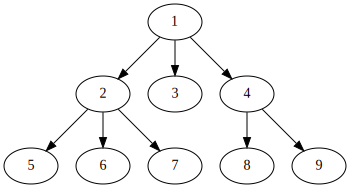

In [34]:
from graphviz import Digraph
dot = Digraph()
dot.node('1')
dot.node('2')
dot.node('3')
dot.node('4')
dot.node('5')
dot.node('6')
dot.node('7')
dot.node('8')
dot.node('9')
dot.edges(['12'])
dot.edges(['13'])
dot.edges(['14'])
dot.edges(['25'])
dot.edges(['26'])
dot.edges(['27'])
dot.edges(['48'])
dot.edges(['49'])
dot

### 树
#### 树的特征
- 每一个节点有唯一的父节点
- 连通性
- 不带有环<br>

#### 树的属性
度：子节点的数量<br>

#### 树的种类
- 满二叉树
- 完全二叉树
- 排序二叉树
- 红黑树
- B树

### 二叉树及其遍历
* 任何树和二叉树都是等价的
* 有序树：遵循尊便的子节点在前面，右边的子节点在后面

<code>
    struct BinaryTree {
        AnyDataMember;  // 任意数据项
        BinaryTree left_subtree;  // 左子节点
        BinaryTree right_subtree; // 右子节点
    }
</code>

* 二叉树的遍历方法
    * 深度优先
    * 广度优先

 <img style="float: center;" src="./assets/img/sample_binary_tree.jpg" width=300 height=400>
 
 ### 深度优先遍历规则
 * 从上到下顺序访问
 * 先左后右（或者先右后左）
 * 走到尽头就掉头
 
 $1->2->4->2->5->2->1->3->6->7$

 <img style="float: center;" src="./assets/img/sample_binary_tree.jpg" width=300 height=400>
 
 ### 广度优先遍历规则
 * 将整颗二叉树从上到下分层，逐层扫描；
 * 每一层从左导游（也可以从右到左）扫描
 
 $1->2->3->4->5->6->7$

### 使用递归思想实现二叉树的遍历
根据访问根节点的顺序可以分为
* 中序遍历
* 先序遍历
* 后序遍历


<code>
DepthFirstTraverseTree(BinaryTree tree) {
    if (tree = NIL) return;
    DepthFirstTraverseTree(tree.left_subtree);
    PrintNode();
    DepthFirstTraverseTree(tree.right_subtree);
}
</code>

 <img style="float: center;" src="./assets/img/sample_binary_tree.jpg" width=300 height=400 align="left">


## 2.3 堆栈和队列：遍历的数据结构

### 堆栈
| |
| --- |
|  |
|  |
| Hanoi（1, A, T, B) |
| Hanoi（2, A, B, T) |
| ... |
| Hanoi（62, A, B, T) |
| Hanoi（63, A, T, B) |
| Hanoi（64, A, B, T) |

In [1]:
!pygmentize hanoi.cc

#include <stdio.h>

// a: src
// b: dst
void Towers(int n,char a,char t,char b){
	if(n==1){
		printf("Move disk %d from %c to %c\n", n, a, b);
	}
	else{
		Towers(n-1,a,b,t);
		printf("Move disk %d from %c to %c\n", n, a, b);
		Towers(n-1,t,b,a);
	}
}
int main(int argc, char *argv[]) {
	int n = 64;
	Towers(n,'A','T','B');
	return 0;
}


In [4]:
!clang++  -g hanoi.cc -o hanoi
#！gdb

In [6]:
!head -n 30 ./hanoi_stack.txt

GNU gdb (GDB) 7.11
Copyright (C) 2016 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.  Type "show copying"
and "show warranty" for details.
This GDB was configured as "x86_64-linux-gnu".
Type "show configuration" for configuration details.
For bug reporting instructions, please see:
<http://www.gnu.org/software/gdb/bugs/>.
Find the GDB manual and other documentation resources online at:
<http://www.gnu.org/software/gdb/documentation/>.
For help, type "help".
Type "apropos word" to search for commands related to "word"...
Reading symbols from ./hanoi...done.
gdb) 
(gdb) break hanoi.cc:7
Breakpoint 1 at 0x401155: file hanoi.cc, line 7.
(gdb) r
Starting program: /home/jiaosong/workspace/src/github/joeshow79/algorithm/the_essence_of_computing/hanoi 

Breakpoint 1, Towers (n=1, a=65 'A', t=66 'B', b=84 'T') at h

In [8]:
!head -n 89 ./hanoi_stack.txt | tail -n 60

#5  0x0000000000401191 in Towers (n=6, a=65 'A', t=84 'T', b=66 'B') at hanoi.cc:10
#6  0x0000000000401191 in Towers (n=7, a=65 'A', t=66 'B', b=84 'T') at hanoi.cc:10
#7  0x0000000000401191 in Towers (n=8, a=65 'A', t=84 'T', b=66 'B') at hanoi.cc:10
#8  0x0000000000401191 in Towers (n=9, a=65 'A', t=66 'B', b=84 'T') at hanoi.cc:10
#9  0x0000000000401191 in Towers (n=10, a=65 'A', t=84 'T', b=66 'B') at hanoi.cc:10
#10 0x0000000000401191 in Towers (n=11, a=65 'A', t=66 'B', b=84 'T') at hanoi.cc:10
#11 0x0000000000401191 in Towers (n=12, a=65 'A', t=84 'T', b=66 'B') at hanoi.cc:10
#12 0x0000000000401191 in Towers (n=13, a=65 'A', t=66 'B', b=84 'T') at hanoi.cc:10
#13 0x0000000000401191 in Towers (n=14, a=65 'A', t=84 'T', b=66 'B') at hanoi.cc:10
#14 0x0000000000401191 in Towers (n=15, a=65 'A', t=66 'B', b=84 'T') at hanoi.cc:10
#15 0x0000000000401191 in Towers (n=16, a=65 'A', t=84 'T', b=66 'B') at hanoi.cc:10
#16 0x0000000000401191 in Towers (n=17, a=65 'A', t=66 'B', b=84 'T')

### 简单计算器
实现一个简单计算器，它支持不带括号的四则运算，计算要满足先乘除后加减的规则。

$5+4-2=$

$5-4*3/4=$

### 队列
#### 借助队列实现宽度优先的二叉树遍历算法

<code>BreadthFirstTraverseTree(BinaryTree tree){
    if (tree = NIL) return;   
    while (队列 queue不为空) {
        if (node.left_subtree != NIL) {
            将node.left_subtree放进队列queue
        }
        if (node.right_subtree != NIL) {
            将node.right_subtree放进队列queue
        }
    }
}</code>

 <img style="float: center;" src="./assets/img/sample_binary_tree.jpg" width=300 height=400>

| | | | | | | | |
| --- | --- | --- | --- | --- | --- | --- | --- |
|将根节点推入Queue | 1 |  |  |  |  |  |  |  |
|Queue循环    #1 | **1** | ___2___ | ___3___ |  |  |  |  |  |
|Queue循环    #2  | 1 | **2** | 3 | ___4___ | ___5___ |  |  |  |
|Queue循环    #3  | 1 | 2 | **3** | 4 | 5 | __6__ |  |  |
|Queue循环    #4  | 1 | 2 | 3 | **4** | 5 | 6 |  |  |
|Queue循环    #5  | 1 | 2 | 3 | 4 | **5** | 6 |  |  |
|Queue循环    #6  | 1 | 2 | 3 | 4 | 5 | **6** | ___7___ |  |
|Queue循环    #7  | 1 | 2 | 3 | 4 | 5 | 6 | **7** |  |



## 2.4 嵌套：自然语言的机构特征

### 计算机和常人思维方式的差异

 <img style="float: center;" src="./assets/img/computer_vs_human.jpg" width=600 height=400 align="center">


### 语法规则
   



| | |
| --- | --- |
| 句子 = 主语部分 + 谓语部分 | 主语部分 = 定语 + 名词短语 |
| 定语= 名词短语 \| 形容词短语 |  名词短语 = 形容词 + 名词|
| 名词短语 = 名词 | 谓语部分 = 位于 + 宾语 |
| 谓语部分 = 谓语 + 状语 | 宾语 = 句子\|名词短语 |
| 状语 = 副词 + 动词| |

### 语法树

今年北京颐和园的游客人数比往年减少了一成

 <img style="float: center;" src="./assets/img/pragmar_tree.png" width=300 height=400 align="center">


### 文法分析方法
* 上下文无关文法分析

如：名词短语 = 数量词 + 形容词 + 名词

$O(N^2)$

* 上下文相关文法分析

如：（介词）名词短语（副词）= （介词）数量词 + 形容词 + 名词（副词）

$O(N^6)$


## 总结
1. 递推和递归
- 人的思维通常是递推，即从小到大、从简单情况到复杂情况、自顶向下拓展的，先把简单的问题搞清楚，看看能否找到规律，在用于复杂的情况
- 计算思维通常是递归，自顶向下，先把大问题分解为小问题，小问题和大问题有着同样的结构和解决方法
2. 遍历
- 二叉树及深度有限遍历
3. 堆栈和队列
- 堆栈LIFO
- 队列FIFO
4. 嵌套
- 自然语言的文法分析，就是把线性的句子变成一棵语法树
- 分析一个语句需要很多文法规则
- 文法规则过去由人工编写，现在通过机器学习得到
- 文法规则可以是上下文无关的，也可以是上下文相关的

## 思考题
### 2.1 上台阶问题的扩展

## 思考题
### 2.2 
#### Q1. 修改中序遍历算法2.2，将它变成先序遍历或者后序遍历算法。(⭐)

## 思考题
#### Q2. （二叉排序树）有这样一串数字5，2，8，0，10，7，18，20，30，12，15，1，将它们简称一棵二叉排序树。二叉排序树满足下面的条件。（⭐⭐）
    （1）如果左子树不为空，则左子树上所有节点的值均小于树的根几点的值。同样，如果右子树补位空，则右子树上所有节点的值均大于树的根节点的值。
    （2）左右子树本身也是二叉排序树。
    对于上述数字，我们在建立二叉排序树时，先把第一个数字5放在根节点，然后扫描第二个数字2，由于它比根节点的数字5小，因此我们将它放在左子树中。接下来我们扫描第三个数字8，由于它比根节点的数字5大，因此我们将它放在右子树中。重复上述过程，我们可以简称完整的二叉排序树。请完成下面三个小问题。
    （1）写一个算法完成上述操作。
    （2）这个算法的复杂度是多少？
    （3）用何种遍历方法得到的结果恰好把上面的一串数字排好序？

## 思考题
### 2.3
#### Q1. 写出简单计算器的伪代码。（⭐）
#### Q2. 回旋打印二叉树的节点。（⭐⭐⭐）
修改二叉树的广度遍历算法，使得偶数行的节点从左向右遍历，奇数行的节点从右向左遍历。

## 思考题
### 2.4
#### Q1. 二叉树的最大深度（也被称为树的高度）是从根节点到最远的叶子节点的节点数。请写一个判定任意二叉树最大深度的算法。（⭐）
#### Q2. 如何在一个二叉树排序树中找到第二大的元素。（⭐）

# 参考
1. [Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, and Clifford Stein. <<Introduction to Algorithms](https://item.jd.com/10026866638030.html)<br>
2. [Charles E. Leiserson, Julian Shun etc. Bit Hacks, Performance Engineering of Software System](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-172-performance-engineering-of-software-systems-fall-2018/lecture-slides/MIT6_172F18_lec3.pdf)<br>
3. [Charles E. Leiserson, Julian Shun etc. ANALYSIS OF MULTITHREADED ALGORITHMS, Performance Engineering of Software System](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-172-performance-engineering-of-software-systems-fall-2018/lecture-slides/MIT6_172F18_lec8.pdf)<br>
4. [Charles E. Leiserson, Julian Shun etc. Cache-Oblivious Algorithms , Performance Engineering of Software System](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-172-performance-engineering-of-software-systems-fall-2018/lecture-slides/MIT6_172F18_lec15.pdf)<br>